In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}
os.sys.path.append('../')
from soundkit.fit import datagen, models
import tensorflow as tf
import tensorflow.keras.applications as imagenet_models


#### Create data generator
---

In [2]:
# get a list of train/val files and create label dictionary
files_train, files_val, labels = datagen.get_files_and_label_dict(['./tmp/positive/', './tmp/negative/'])


In [3]:
# check number of samples per class
datagen.num_pos_neg_per_class(files_train)
datagen.num_pos_neg_per_class(files_val)


,Class,Positives,Negatives
0,4931_1,144,707
1,42545_1,48,582


,Class,Positives,Negatives
0,4931_1,35,178
1,42545_1,15,143


In [4]:
# get label vector
y_train = datagen.get_labels_pos_neg_per_class(files_train, labels)
y_val = datagen.get_labels_pos_neg_per_class(files_val, labels)


In [5]:
y_train.shape

(1481, 2)

#### No augmentation

In [6]:
traingen = datagen.TrainGenerator(files_train,
                                  y_train,
                                  labels,
                                  batch_size = 16,
                                  augment=False)
%time batch = traingen.__getitem__(0)
print('Batch shape:',batch[0].shape)
print('Target shape:',batch[1].shape)
# datagen.plot_batch(batch[0])


CPU times: user 10.5 ms, sys: 4.79 ms, total: 15.3 ms
Wall time: 15.3 ms
Batch shape: (16, 513, 296)
Target shape: (16, 2)


#### Default augmentation

CPU times: user 165 ms, sys: 28.4 ms, total: 193 ms
Wall time: 157 ms
Batch shape: (16, 513, 296)
Target shape: (16, 2)


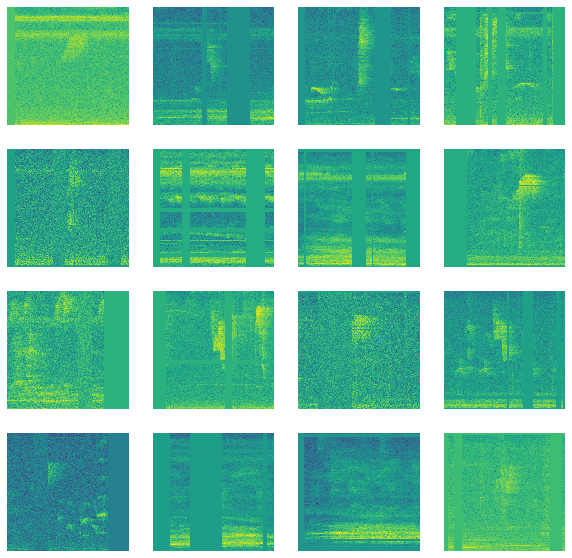

In [7]:
traingen = datagen.TrainGenerator(files_train,
                                  y_train,
                                  labels,
                                  batch_size = 16,
                                  augment=True)
%time batch = traingen.__getitem__(0)
print('Batch shape:',batch[0].shape)
print('Target shape:',batch[1].shape)
datagen.plot_batch(batch[0])


#### All options

CPU times: user 22.7 ms, sys: 19.9 ms, total: 42.6 ms
Wall time: 39.5 ms
Batch shape: (16, 513, 296)
Target shape: (16, 2)


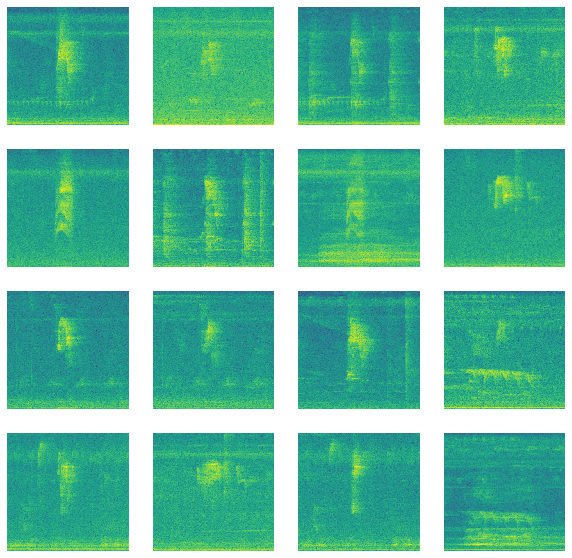

In [8]:
traingen = datagen.TrainGenerator(files_train,
                                  y_train,
                                  labels,
                                  batch_size = 16,
                                  augment = True,
                                  augment_blend_prob = 1,
                                  augment_max_time_masks = 0,
                                  augment_max_time_mask_size = 0,
                                  augment_max_freq_masks = 0,
                                  augment_max_freq_mask_size = 0,
                                  augment_add_noise_prob = 0,
                                  augment_add_noise_stds = 0,
                                  augment_max_time_shift = 0,
                                  augment_max_freq_shift = 0,
                                  shuffle = True,
                                  assume_absent = True,
                                  label_format = 'multi-label')
%time batch = traingen.__getitem__(0)
print('Batch shape:',batch[0].shape)
print('Target shape:',batch[1].shape)
datagen.plot_batch_samples(batch[0])


#### Create model
---

In [9]:
model = models.ImageNetModel(backbone=imagenet_models.MobileNetV2,
                             num_classes=len(labels),
                             input_shape=batch[0][0].shape)


In [10]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.BinaryCrossentropy())


In [11]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 513, 296)]        0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 513, 296, 1)      0         
                                                                 
 tf.repeat (TFOpLambda)      (None, 513, 296, 3)       0         
                                                                 
 tf.image.resize (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.image.per_image_standard  (None, 224, 224, 3)      0         
 ization (TFOpLambda)                                            
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       225798

In [12]:
model.fit(traingen)


92/92 [==============================] - 13s 84ms/step - loss: 0.2687
